In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

PART 1 (Python Pandas)


In [9]:
data = pd.read_excel(r'..\athena_test\data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                20 non-null     int64         
 1   Name              20 non-null     object        
 2   Sale Revenue      20 non-null     int64         
 3   Operational Cost  20 non-null     int64         
 4   Time              20 non-null     datetime64[ns]
 5   City              20 non-null     object        
 6   State             20 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.2+ KB


In [10]:
data['Time'].value_counts()

Time
2021-02-01    6
2021-01-01    5
2021-03-01    5
2021-04-01    4
Name: count, dtype: int64

In [11]:
data['Profit'] = data['Sale Revenue'] - data['Operational Cost']


df_repr = data.groupby('Name').agg(
    aver_revenue = ('Sale Revenue','mean'),
    aver_profit = ('Profit','mean')
).reset_index()

#top 3 sale representatives with most average revenues gained
print('Top 3 sale representatives with most average revenues gained')
print(df_repr.sort_values('aver_revenue',ascending=False)['Name'].head(3),'\n\n')

#top 3 sale representatives with most average profit gained
print('Top 3 sale representatives with most average profit gained')
print(df_repr.sort_values('aver_profit',ascending=False)['Name'].head(3))

Top 3 sale representatives with most average revenues gained
3       Tan
4    Taylor
1       Joe
Name: Name, dtype: object 


Top 3 sale representatives with most average profit gained
4    Taylor
3       Tan
1       Joe
Name: Name, dtype: object


In [12]:
data.groupby(['Time','City','State']).agg(
    total_revenue = ('Sale Revenue','sum'),
    total_operational_cost = ('Operational Cost','sum'),
    total_profit = ('Profit','sum')
).reset_index()

,Time,City,State,total_revenue,total_operational_cost,total_profit
0,2021-01-01,Chicago,IL,17320,8430,8890
1,2021-01-01,Miami,FL,7850,3240,4610
2,2021-01-01,Minnepolis,MN,23140,11760,11380
3,2021-01-01,San Diego,CA,32140,10300,21840
4,2021-01-01,Vancouver,BC,19240,10630,8610
5,2021-02-01,Austin,TX,31340,13240,18100
6,2021-02-01,Boston,MA,16320,9940,6380
7,2021-02-01,Los Angeles,CA,14260,9970,4290
8,2021-02-01,Phoenix,AZ,22490,18240,4250
9,2021-02-01,San Francisco,CA,29550,9780,19770


Part 2: SQL

In [13]:
#1 .Given that all events are occured chronologically (in time order)

sql1 = """SELECT event from USER_EVENT order by date_time asc """


#1.1 how long does it take for user bruce to unlock second map?

sql1_1 = """--sql
with t as (
SELECT datetime, ROW_NUMBER() OVER(PARTITION BY user_name,evnet order by datetime asc) as row_n from USER_EVENT
WHERE 
1 = 1 
and user_name = 'bruce' and evnet = 'map_unclock' 

and (row_n = 1 or row_n = 2)
)

select max(datetime) - min(datetime) from t
"""


#1.2 How long does it take for user stein to make purchase after having sold his items?

sql1_2 = """--sql
with t_sell as (
select user_name, datetime as sell_dt from USER_EVENT
WHERE 1= 1
and event  = 'sell'
),

t_pur as (
select user_name, datetime as purchase_dt from USER_EVENT
WHERE 1= 1
and event  = 'purcase'
)


select MIN(t_pur.purchase_dt - t_sell.sell_dt) from t_sell
JOIN t_pur on t_pur.user_name = t_sell.user_name
where t_pur.purchase_dt > t_sell.sell_dt
"""


In [14]:
#2/ How many users do we have for each platform?
sql2 = """--sql
SELECT g.platform, count(distinct u.user_id) from USER_EVENT u
left join  GAME_PROFILE g on g.game_id = u.game_id
group by g.platfrom
"""


#3/ How many daily events do we have on average?
sql3 = """--sql
witl t as (
SELECT CAST(datetime as date) date_, count(event) as events from USER_EVENT
group by CAST(datetime as date)
)

select  AVG(events) from t

"""

#4 How long have the games been launched?
sql4 = """--sql
SELECT game_id,game_title, DATEDIFF(day,launch_date,CURRENT_DATE) as r_days from GAME_PROFILE
"""

Part 3: The Association of Used Car Dealers wants to study the maintenance costs for the first year after cars have come off the manufacturer’s warranty. How large a sample is needed when s = $575 and E = $100? Calculate the sample size using 90%, 95%, 98%, and 99% confidence levels.

In [41]:
df = pd.DataFrame({'Confidence_level':['90%','95%','98%','99%'],'z_score':[1.65,1.96,2.33,2.58]})


def get_sample(z_score,s= 575, e = 100):
    n = (z_score * s / e)**2
    return n

df['estimated_sample'] = df['z_score'].apply(get_sample)
df
    

,Confidence_level,z_score,estimated_sample
0,90%,1.65,90.012656
1,95%,1.96,127.012900
2,98%,2.33,179.493006
3,99%,2.58,220.077225


Part 4: 
A poker-dealing machine is supposed to deal cards at random, as if from an infinite deck. In a test, you counted 1600 cards, and observed the following:
Spades: 404 Hearts: 420 Diamonds: 400 Clubs : 376
Could it be that the suits are equally likely? Or are these discrepancies too much to be random?


\begin{gather*}
H_0: P_s = P_h = P_d = P_c\\
H_1: P_s <> P_h <> P_d <> P_c
\end{gather*}

In [15]:
data4 = pd.DataFrame({'Cards':['Spade','Heart','Diamond','Club'],'O':[404,420,400,376]})

In [40]:
data4['E'] = 400

def get_z(x):
    o = x[0]
    e = x[1]
    z = (o-e)/np.sqrt(e)
    return z
data4['Z'] = data4[['O','E']].apply(get_z,axis = 1)
chi_square = sum(data4['Z']**2)
print('chi-square: ', chi_square)


cr_value = stat.chi2.ppf(1-.05,3)
print('critical value: ', cr_value)

if chi_square > cr_value:
    print(chi_square, " > ",cr_value)
    print('Answer: these are discrepancies too much to be random')
else: 
    print(chi_square, " < ",cr_value)
    print(r"Answer: It's that the suits are equally likely")


chi-square:  2.48
critical value:  7.814727903251179
2.48  <  7.814727903251179
Answer: It's that the suits are equally likely


2.48

Part 5:

constraints:
- 50x + 24y <=  2400 (1)
- 24x + 33y <=  2100 (2)
- x >= 75 - 30 (3)
- y >= 95 - 90 (4)
The objective is: maximise (x+30-75) + (y+90-95) = (x+y-50)


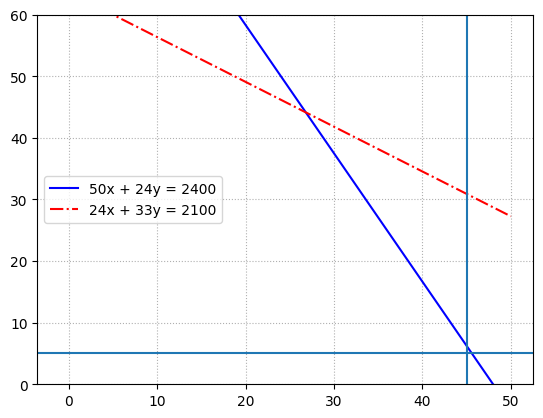

In [16]:


x = np.linspace(-1, 50, 200)
y1 = (2400 - 50*x) / 24
plt.plot(x, y1, 'b', label ='50x + 24y = 2400')

y2 = (2100 - 24*x)/33
plt.plot(x, y2, 'r-.', label ='24x + 33y = 2100')


plt.axvline(x = 45)
plt.axhline(y=5)

plt.ylim(0,60)
plt.legend()
plt.grid(True, linestyle =':')

Feasible region has 3 point with (45; 5), (45 ; 6.25) and (45.6 ; 5). With x = 45 and y = 6.25
> With x = 45 and y = 6.25, we have the maximum value of the equation *x + y - 50*